In [ ]:
import numpy as np
import pandas as pd


Importamos los datos.

In [ ]:
df=pd.read_csv("/content/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv")


Cambiamos nombres de columnas.

In [ ]:
df.drop(df.columns[[4,9]],axis=1,inplace=True)
df.columns=["Timestamp","Age","Industry","Title","Salary","Add_Comp","Currency","Other_Currency","Country","State","City","Experience_OvAll","Experience_Field","Education","Gender","Race"]
df.head()

,Timestamp,Age,Industry,Title,Salary,Add_Comp,Currency,Other_Currency,Country,State,City,Experience_OvAll,Experience_Field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


Establecemos el salario como float.

In [ ]:
df["Salary"]=df["Salary"].map(lambda x: x.replace(",",""))
df["Salary"]=df["Salary"].astype(float)
df.dtypes

,0
Timestamp,object
Age,object
Industry,object
Title,object
Salary,float64
Add_Comp,float64
Currency,object
Other_Currency,object
Country,object
State,object


Revisamos Industrias más comunes.

In [ ]:
pd.value_counts(df['Industry'])[:25]

<ipython-input-6-bc4a863432d4>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Industry'])[:25]


,count
Industry,
Computing or Tech,4712
Education (Higher Education),2466
Nonprofits,2420
Health care,1899
Government and Public Administration,1893
"Accounting, Banking & Finance",1812
Engineering or Manufacturing,1700
"Marketing, Advertising & PR",1136
Law,1097


Nos quedamos con las 25 más comunes, al resto las asignamos como otro.

In [ ]:
inds=pd.value_counts(df['Industry'])[:25].index.to_list()

df.loc[~df['Industry'].isin(inds),'Industry']='Other'
pd.value_counts(df['Industry'])

<ipython-input-7-905555e99bb2>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  inds=pd.value_counts(df['Industry'])[:25].index.to_list()
<ipython-input-7-905555e99bb2>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Industry'])


,count
Industry,
Computing or Tech,4712
Education (Higher Education),2466
Nonprofits,2420
Other,2293
Health care,1899
Government and Public Administration,1893
"Accounting, Banking & Finance",1812
Engineering or Manufacturing,1700
"Marketing, Advertising & PR",1136


In [ ]:
!pip install unidecode
!pip install country_list

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.2 MB/s eta 0:00:00


Formateamos nombres de los países.

In [ ]:
from unidecode import unidecode

df.Country=df.Country.str.strip()
df.City=df.City.str.strip()
df["Country"]=df["Country"].map(lambda x: unidecode(x.replace(x[0],x[0].upper())))

us_typos=["I.S.","JERSEY","CALIFORNIA","UNITED Y","SAN FRANCISCO","UA","USAT","UNITED STTES","UNITED STARES","U.SA","🇺🇸","UNITED STATSS","UNITED STATUES","IS","U. S","U.A.","UNITED STATUS","UNITED STATTES","UNITED SATES","UNITES STATES","UNITED STATWS",'ISA',"U. S.","U.S","U.S.A","UNITED STATE","UNITED STATES","US","USA","U.S.","U.S>","U.S.A.","AMERICA","UNITED STATES OF AMERICA","THE UNITED STATES","UNITED STATE OF AMERICA","UNITED STATED","UNITED SATES OF AMERICA"]
uk_typos=["UK","ENGLAND","WALES","NORTHERN IRELAND","U.K.","UNITED KINDOM","U.K","ENGLANG","GREAT BRITAIN","LONDON","BRITAIN","UNITES KINGDOM","SCOTLAND"]
czk_typos=["CZECHIA","CESKA REPUBLIKA"]


df["Country"]=df["Country"].map(lambda x: "United States" if x.upper() in us_typos or "UNITED STATES" in x.upper() or "STATE" in x.upper() or "US" in x else x)
df["Country"]=df["Country"].map(lambda x: "United Kingdom" if x.upper() in uk_typos or "UNITED KINGDOM" in x.upper() or "UK" in x or "ENGLAND" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "Netherlands" if "NETHER" in x.upper() or "NEDER" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "New Zealand" if "ZEALAND" in x.upper() or x.upper() in "NZ" else x)
df["Country"]=df["Country"].map(lambda x: "Canada" if "CAN" in x.upper() or "CSNADA" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "Australia" if "AUSTRAL" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "Czechia" if "CZECH REPUBLIC" in x.upper() or x.upper()in czk_typos else x)
df["Country"]=df["Country"].map(lambda x: "Philippines" if "PHILIP" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "India" if "INDIA" in x.upper() or "IBDIA" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "Italy" if "ITAL" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "China" if "HONG" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "France" if "FRANCE" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Switzerland" if "SWITZERLAND" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Nigeria" if "NIGERIA" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Luxembourg" if "LUXEM" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "China" if "CHINA" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Brazil" if "BRAZIL" in x.upper() or "BRASIL" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "United Arab Emirates" if "UNITED ARAB EMIRATES" in x.upper() or  x.upper() in "UAE" else x)
df["Country"]=df["Country"].map(lambda x: "Côte d’Ivoire" if "COTE D'IVOIRE" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Bahamas" if "BAHAMAS" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Trinidad & Tobago" if "TRINIDAD" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Bosnia & Herzegovina" if "BOSNIA" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Myanmar (Burma)" if "MYANMAR" in x.upper() or "BURMA" in x.upper()  else x)
df["Country"]=df["Country"].map(lambda x: "Sri Lanka" if "SRI LANKA" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "South Africa" if "SOUTH AFRICA" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "Congo - Kinshasa" if "CONGO" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "Denmark" if "DENMARK" in x.upper() or "DANMARK" in x.upper() else x)
df["Country"]=df["Country"].map(lambda x: "Spain" if "CATALONIA" in x.upper() else x)

df.Country.unique()

array(['United States', 'United Kingdom', 'Canada', 'Netherlands',
       'Australia', 'Spain', 'Finland', 'France', 'Germany', 'Ireland',
       'India', 'Argentina', 'Denmark', 'Switzerland', 'Bermuda',
       'Malaysia', 'Mexico', 'South Africa', 'Belgium', 'Sweden', 'China',
       'Kuwait', 'Norway', 'Sri Lanka', 'Contracts',
       "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located",
       'Greece', 'Japan', 'Austria', 'Brazil', 'Global', 'Hungary',
       'Luxembourg', 'Colombia', 'New Zealand', 'Trinidad & Tobago',
       'Cayman Islands', 'Czechia', 'Latvia', 'Puerto Rico', 'Rwanda',
       'United Arab Emirates', 'Bangladesh', 'Romania',
       'Currently finance', 'Serbia', 'Philippines', 'Russia', 'Poland',
       'UXZ', 'Turkey', '$2,175.84/year is deducted for benefits',
       'Italy', 'Jersey, Channel islands', 

Revisamos valores que el código considera como no países.

En caso que exista un país entre estos datos, modificar la celda anterior para que sea considerado como tal.

In [ ]:
not_countries={}
from country_list import countries_for_language
countries=[country for code, country in countries_for_language('en')]
for elem in df.Country.unique():
  if elem not in countries:
    not_countries[elem]="Null"
    print(elem)

Contracts
We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located
Global
Currently finance
UXZ
$2,175.84/year is deducted for benefits
Jersey, Channel islands
Virginia
Hartford
Remote
NL
Bonus Based on meeting yearly goals set w/ my supervisor
International
I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission.
Austria, but I work remotely for a Dutch/British company
I was brought in on this salary to help with the EHR and very quickly was promoted to current position but compensation was not altered.
N/a (remote from wherever I waNt)
Africa
Y
EuropE
ARGENTINA BUT MY ORG IS IN THAILAND
Na
Policy
Company in Germany. I work from Pakistan.
SS
Dbfemf
LOUTRELAND
FF


In [ ]:
df["Country"]=df["Country"].map(lambda x: not_countries.get(x,x))
df.head()


,Timestamp,Age,Industry,Title,Salary,Add_Comp,Currency,Other_Currency,Country,State,City,Experience_OvAll,Experience_Field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,NaN,USD,NaN,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,NaN,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,NaN,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


Obtenemos la tasa de intercambio del COP a través de la API.

In [ ]:
link='https://cdn.jsdelivr.net/npm/@fawazahmed0/currency-api@latest/v1/currencies/cop.json'
import requests
import json

api=requests.get(link).json()


Limpiamos la moneda AUD/NZD.

In [ ]:
df.loc[df['Country']=='Australia','Currency']='AUD'
df.loc[df['Country']=='New Zealand','Currency']='NZD'
df.loc[df['Currency']=='AUD/NZD','Currency']='OTHER'

Creamos una columna con las tasa de intercambio y obtenemos los salarios en COP multiplicando la columna de salario por la de tasa de intercambio.

Adicional, creamos una columna para representar el salario total en COP.

In [ ]:
api_rates=api['cop']

dic_rates={}
for currency in df.Currency.unique():
  if currency.lower()!='other':
   dic_rates[currency]=1/api_rates[currency.lower()]

df['EXC/COP']=df.Currency.map(lambda x: dic_rates.get(x,np.nan))
df['COP_Salary']=df.Salary*df['EXC/COP']
df['COP_Comp']=df.Add_Comp*df['EXC/COP']
df['COP_Tot']=df['COP_Salary'].fillna(0.0)+df['COP_Comp'].fillna(0.0)
df['COP_Tot']=df['COP_Tot'].replace(0.0,np.nan)

Eliminamos los valores atípicos en el salario.

In [ ]:
q1=df['COP_Tot'].quantile(0.25)
q3=df['COP_Tot'].quantile(0.75)
iqr=q3-q1

lower_bound = q1 - 2 * iqr
upper_bound = q3 + 2 * iqr

df_clean= df[(df['COP_Tot'] >= lower_bound) & (df['COP_Tot'] <= upper_bound)]

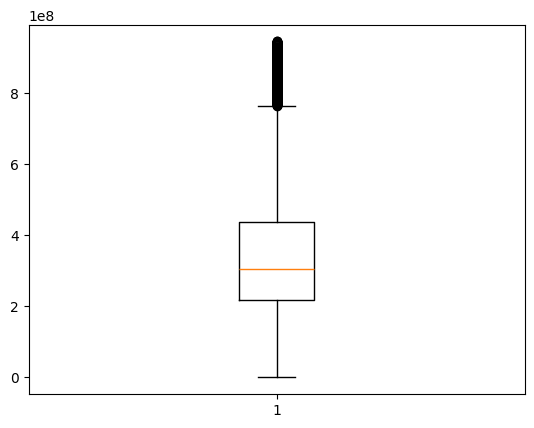

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df_clean['COP_Tot'])
plt.show()

In [ ]:
df_clean['COP_Tot'].describe()

,COP_Tot
count,2.682800e+04
mean,3.471203e+08
std,1.763230e+08
min,1.119481e+04
25%,2.184509e+08
50%,3.065428e+08
75%,4.369019e+08
max,9.459338e+08


Variables de la base final.

In [ ]:
df_clean.head()

,Timestamp,Age,Industry,Title,Salary,Add_Comp,Currency,Other_Currency,Country,State,City,Experience_OvAll,Experience_Field,Education,Gender,Race,EXC/COP,COP_Salary,COP_Comp,COP_Tot
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,4121.715920,2.266944e+08,0.000000e+00,2.266944e+08
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,5113.092139,2.791748e+08,2.045237e+07,2.996272e+08
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,NaN,USD,NaN,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,4121.715920,1.401383e+08,NaN,1.401383e+08
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,62000.0,3000.0,USD,NaN,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,4121.715920,2.555464e+08,1.236515e+07,2.679115e+08
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,NaN,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,4121.715920,2.473030e+08,2.885201e+07,2.761550e+08


Exportamos la nueva base como un csv.

In [ ]:
df_clean.to_csv("cleaned.csv",index_label="Id")